In [42]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import gzip
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import torch
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras

In [43]:
train_data = pd.read_csv("./data/fmnist/fashion-mnist_train.csv")
test_data = pd.read_csv("./data/fmnist/fashion-mnist_test.csv")

In [44]:
train_x = np.array(train_data.iloc[:,1:])
train_y = np.array(train_data.iloc[:, 0])
test_x = np.array(test_data.iloc[:, 1:])
test_y = np.array(test_data.iloc[:,0])
labels_to_name = { 0:"T-shirt/top", 1 :"Trouser", 2 :"Pullover", 3 :"Dress", 4 :"Coat", 5 :"Sandal", 6 :"Shirt", 7 :"Sneaker", 8 :"Bag", 9 :"Ankle boot"}

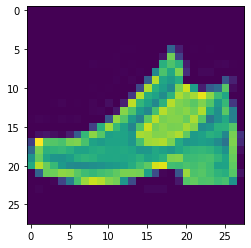

In [45]:
# Plotting and seeing the data
plt.imshow(train_x[1].reshape((28, 28)))
plt.show()

In [46]:
# train_x = train_x / 255
# test_x = test_x / 255

In [47]:
def compute_accuracy(y_true, y_pred):
    correct_classif = 0
    total = len(y_true)
    for i in range(total):
        if(y_true[i] == y_pred[i]):
            correct_classif += 1
    return correct_classif / total

In [48]:
model = Sequential()
model.add(layers.Input())
model.add(layers.Dense(256, kernel_initializer='random_normal', activation='relu', use_bias=True))
model.add(layers.Dense(128, kernel_initializer='random_normal', activation='relu', use_bias=True))
model.add(layers.Dense(64, kernel_initializer='random_normal', activation='relu', use_bias=True))
model.add(layers.Dense(10, kernel_initializer='random_normal', activation='softmax', use_bias=True))

In [49]:
sgd = optimizers.SGD(lr=1e-3)

c:\Users\Samyak Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [28]:
# model_input = layers.Input(784, )
# model_output = model(model_input)
# feedforward_model = keras.Model(inputs=model_input, outputs=model_output)

In [50]:
model.compile(
    optimizer = sgd,
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# feedforward_model.summary()

In [63]:
history = model.fit(
  train_x,
  to_categorical(train_y),
  epochs=50,
  batch_size=64,
)

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1851 - accuracy: 0.9325
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1827 - accuracy: 0.9339
Epoch 3/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1799 - accuracy: 0.9341
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1777 - accuracy: 0.9351
Epoch 5/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1756 - accuracy: 0.9361
Epoch 6/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1733 - accuracy: 0.9373
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1705 - accuracy: 0.9386
Epoch 8/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1695 - accuracy: 0.9393
Epoch 9/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1660 - accuracy: 0.9404
Epoch 10/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1651 - accuracy: 0.9410

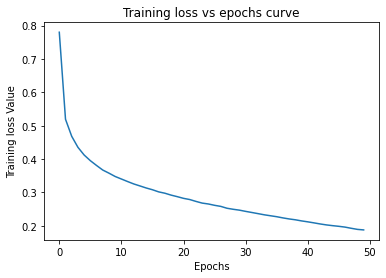

In [54]:
train_losses = history.history['loss']
plt.plot([i for i in range(50)], train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training loss Value')
plt.title('Training loss vs epochs curve')
plt.savefig('./plots/q2_lossplot.png', facecolor='w', bbox_inches='tight')

In [55]:
model.save('./models/q2')

INFO:tensorflow:Assets written to: ./models/q2\assets


In [56]:
trained_model = load_model('./models/q2')

In [57]:
test_output = trained_model.predict(test_x)

In [58]:
final_predictions = np.argmax(test_output, axis=1)

In [59]:
final_predictions

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

In [62]:
overall_accuracy = compute_accuracy(test_y, final_predictions)
print(f"\nOverall accuracy = {overall_accuracy}\n\n-------------\n")

# #Class-wise-accuracy
class_wise_accuracy = {}
for lab in labels_to_name.keys():
    class_idxs = np.where(test_y == lab)[0]
    true_labs = test_y[class_idxs]
    pred_labs = np.array(final_predictions)[class_idxs]
    class_wise_accuracy[lab] = compute_accuracy(true_labs, pred_labs)
for lab in class_wise_accuracy.keys():
    print(f"Class-wise accuracy for class-{lab} : {class_wise_accuracy[lab]}")


Overall accuracy = 0.8772

-------------

Class-wise accuracy for class-0 : 0.772
Class-wise accuracy for class-1 : 0.975
Class-wise accuracy for class-2 : 0.79
Class-wise accuracy for class-3 : 0.892
Class-wise accuracy for class-4 : 0.865
Class-wise accuracy for class-5 : 0.922
Class-wise accuracy for class-6 : 0.701
Class-wise accuracy for class-7 : 0.967
Class-wise accuracy for class-8 : 0.951
Class-wise accuracy for class-9 : 0.937
